In [63]:
from textblob import TextBlob
from urllib.request import urlopen
#urlopen is used to open a remote object across a network and read it.
#urllib contains func for requesting data across web
from bs4 import BeautifulSoup
#bs is used for pulling data from html/xml files
url="https://en.wikipedia.org/wiki/Machine_learning"
html=urlopen(url).read()#read source code
soup=BeautifulSoup(html)
#Now you have to pass something to BeautifulSoup to create a soup object.
#That could be a document or an URL.(obj creation)
for script in soup(["script","style"]):
    script.extract()
text=soup.get_text()#text format
tweets=[line.strip() for line in text.splitlines()]#lines/space remove

C:\Users\kamil\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\kamil\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [64]:
ptweets = [tweet for tweet in tweets if TextBlob(tweet).sentiment.polarity>0] #TO KNOW THE POSITIVE SENTENCE

In [65]:
print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets))) #PERCENTAGE OF POSITIVE SENTENCE 

Positive tweets percentage: 7.598039215686274 %


In [66]:
ntweets = [tweet for tweet in tweets if TextBlob(tweet).sentiment.polarity<0]
print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))  #PERCENTAGE OF NEGATIVE SENTENCE

Negative tweets percentage: 5.759803921568627 %


In [67]:
neu_tweets = [tweet for tweet in tweets if TextBlob(tweet).sentiment.polarity==0]
print("Neutral tweets percentage: {} %".format(100*len(neu_tweets)/len(tweets)))   #PERCENTAGE OF NEUTRAL SENTENCE

Neutral tweets percentage: 86.6421568627451 %


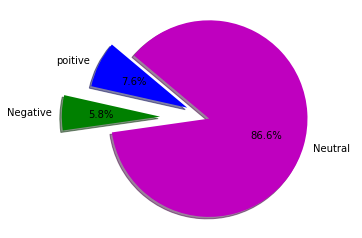

In [71]:
# DATA VISUALIZATION
import matplotlib.pyplot as plt
 
# Data to plot
labels = "poitive","Negative","Neutral"
sizes = [len(ptweets), len(ntweets), len(neu_tweets)]
colors = ["b","g","m"]
explode = (0.25, 0.5, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()